<a href="https://colab.research.google.com/github/chand3695/INFO-5082-Project/blob/main/Netflix_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import numpy as np
import pandas as pd
from numpy import dot
import seaborn as sns
from numpy import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors  

In [2]:
Netflix = pd.read_csv("/content/netflix_titles.csv")
print("Dataframe Details")
print("Total Rows: {}\nTotal Columns: {}".format(Netflix.shape[0],Netflix.shape[1]))

Netflix.dropna(subset=['director','cast','country','date_added','rating'],axis=0,inplace=True)
print()
print("Details after dropping null rows and columns")
print("Total Rows: {}\nTotal Columns: {}".format(Netflix.shape[0],Netflix.shape[1]))

NetflixDatabase = Netflix.copy()

print()
print("Database Created")

Dataframe Details
Total Rows: 7787
Total Columns: 12

Details after dropping null rows and columns
Total Rows: 4808
Total Columns: 12

Database Created


In [3]:
pip install Unidecode

     |████████████████████████████████| 245kB 3.8MB/s 


In [4]:
import unidecode
Netflix['cast'] = Netflix['cast'].apply(lambda x : unidecode.unidecode(x))

Netflix['date_added'] = Netflix['date_added'].apply(lambda x : x[-4:])
Netflix['date_added'] = Netflix['date_added'].astype('int64')
Netflix['show_age'] = 2021 - Netflix['date_added']
Netflix['show_age'] = Netflix['show_age'].apply(lambda x : str(x)+" years")

NetflixVis = Netflix.copy()

Netflix.drop(['date_added','release_year'],axis=1,inplace=True)

print("Data Procesing Done")

Data Procesing Done


In [5]:
NetflixVis.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,show_age
1,s2,Movie,7:19,Jorge Michel Grau,"Demian Bichir, Hector Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,5 years
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",3 years
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",4 years
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1 years
5,s6,TV Show,46,Serdar Akar,"Erdal Besikcioglu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,4 years
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1 years
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019,1997,R,119 min,Dramas,After one of his high school students attacks ...,2 years
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2 years
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4 years
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017,2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,4 years


In [6]:
#Checking for Null Values
Netflix.isnull().sum()

show_id        0
type           0
title          0
director       0
cast           0
country        0
rating         0
duration       0
listed_in      0
description    0
show_age       0
dtype: int64

**Exploratory Data Analysis**

Text(0, 0.5, 'Content Count')

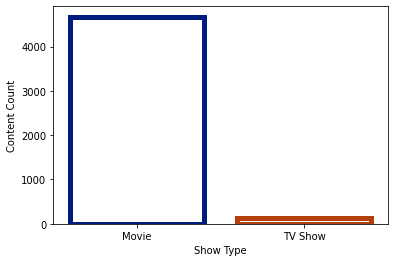

In [7]:
sns.countplot(x = 'type', data = NetflixVis, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.xlabel("Show Type")
plt.ylabel("Content Count")

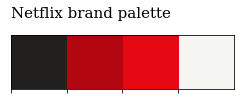

In [8]:
# NETFLIX BRAND PALETTE
import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

def genre_heatmap(data, title):
    data['genre'] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in data['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = data['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


There are 20 types in the Netflix Movie Dataset


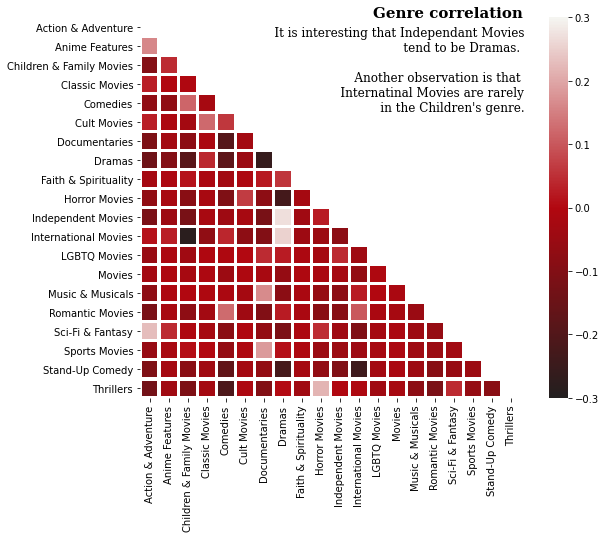

In [12]:
data_tv = Netflix[Netflix["type"] == "TV Show"]
data_movies = Netflix[Netflix["type"] == "Movie"]


genre_heatmap(data_movies, 'Movie')
plt.show()

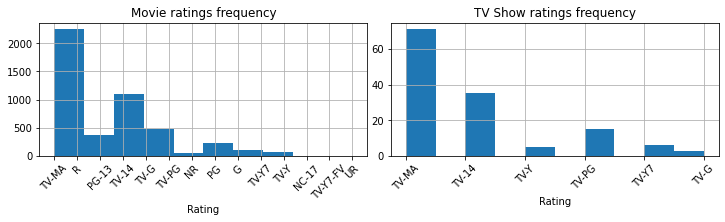

In [13]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
movies_rating = NetflixVis[NetflixVis['type'] == "Movie"]
movies_rating.rating.hist(bins=10)
plt.xlabel("Rating")
plt.title("Movie ratings frequency")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
show_rating = NetflixVis[NetflixVis['type'] == "TV Show"]
show_rating.rating.hist(bins=10)
plt.xlabel("Rating")
plt.title("TV Show ratings frequency")
plt.xticks(rotation = 45)

plt.tight_layout(pad=0.4)

Text(0.5, 0, 'Show Type')

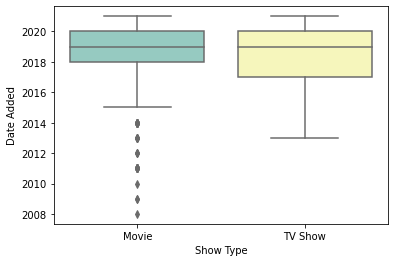

In [14]:
sns.boxplot(x = 'type',y = 'date_added',data=NetflixVis, palette="Set3")
plt.ylabel("Date Added")
plt.xlabel("Show Type")

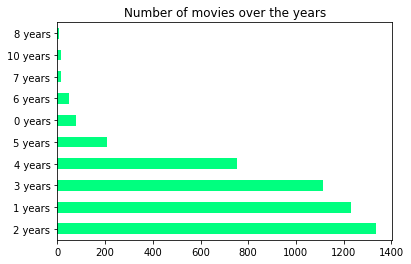

In [15]:
age = NetflixVis['show_age'].value_counts()[:10]
age.plot(kind='barh',title='Number of movies over the years', color='springgreen')

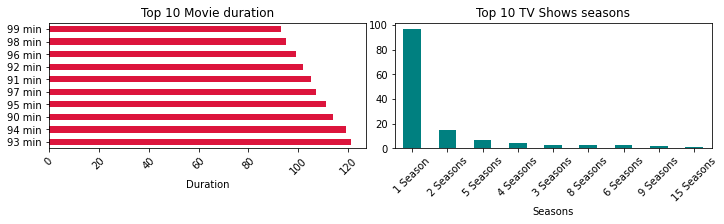

In [16]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
movies_duration = NetflixVis[NetflixVis['type'] == "Movie"]
movies_duration = movies_duration['duration'].value_counts()[:10]
movies_duration.plot(kind='barh',title='Number of movies over the years', color='crimson')
plt.xlabel("Duration")
plt.title("Top 10 Movie duration")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
show_duration = NetflixVis[NetflixVis['type'] == "TV Show"]
show_duration = show_duration['duration'].value_counts()[:10]
show_duration.plot(kind='bar',title='Number of movies over the years', color='teal')
plt.xlabel("Seasons")
plt.title("Top 10 TV Shows seasons")
plt.xticks(rotation = 45)

plt.tight_layout(pad=0.3)


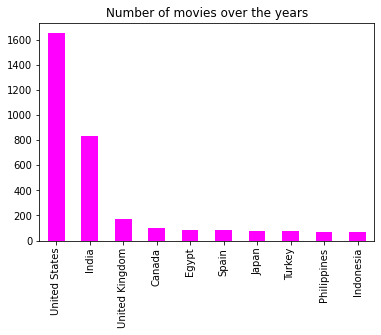

In [17]:
country = NetflixVis['country'].value_counts()[:10]
country.plot(kind='bar',title='Number of movies over the years', color='fuchsia')

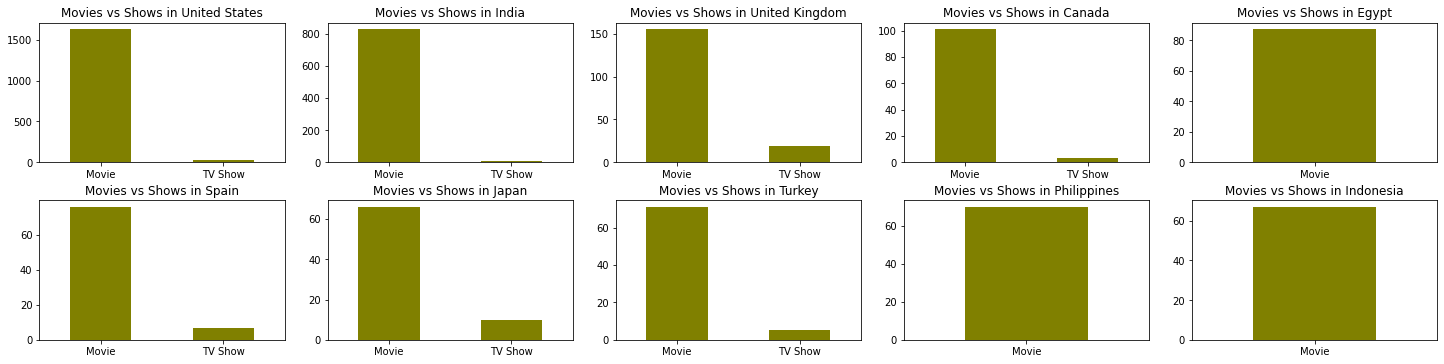

In [18]:
plt.figure(figsize=(20,5))

for i in range(len(country.index)):
    plt.subplot(2,5,i+1)
    moviesvsshows = NetflixVis[NetflixVis['country'] == country.index[i]]
    moviesvsshows = moviesvsshows['type'].value_counts()
    moviesvsshows.plot(kind='bar', color='olive')
    plt.title("Movies vs Shows in {}".format(country.index[i]))
    plt.xticks(rotation = 360)
    
plt.tight_layout(pad=0.5)

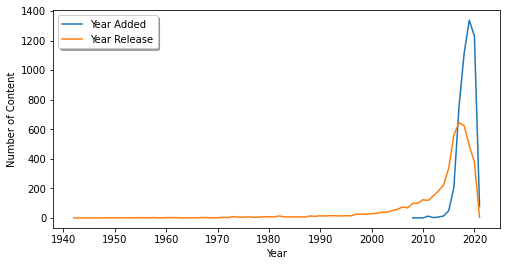

In [19]:
added_year = pd.pivot_table(NetflixVis, values='title', index='date_added', aggfunc=np.count_nonzero)
release_year = pd.pivot_table(NetflixVis, values='title', index='release_year', aggfunc=np.count_nonzero)

plt.figure(figsize=(8,4))
sns.lineplot(x='date_added', y='title', data=added_year, label='Year Added')
sns.lineplot(x='release_year', y='title', data=release_year, label='Year Release')
plt.xlabel("Year")
plt.ylabel("Number of Content")

plt.legend(shadow=True)

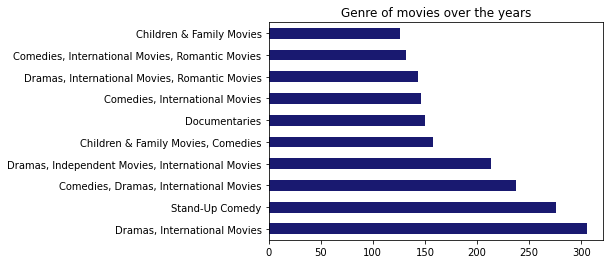

In [20]:
genre = NetflixVis["listed_in"].value_counts()[:10]
genre.plot(kind='barh',title='Genre of movies over the years', color ='midnightblue')

Text(0, 0.5, 'Countries and Genre')

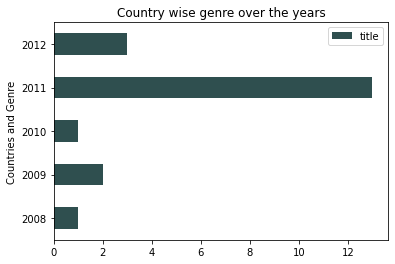

In [21]:
countrygenre = pd.pivot_table(NetflixVis, values='title', index=['country','listed_in'],aggfunc=np.count_nonzero).sort_values(by=['title']
                                                                                                    ,ascending=False)
countrygenre = added_year[:5]   
countrygenre.plot(kind='barh',title='Country wise genre over the years', color='darkslategrey')

plt.ylabel("Countries and Genre")

Text(0.5, 1.0, 'WordCloud for genre ')

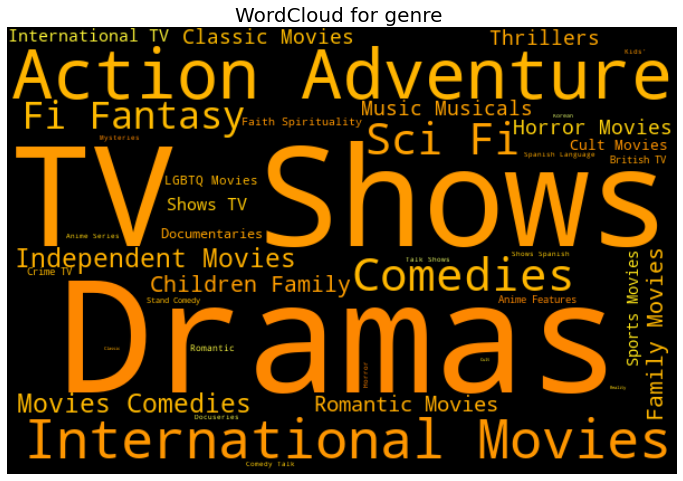

In [22]:
from wordcloud import WordCloud
listed=list(Netflix['listed_in'].unique())
cloud=WordCloud(colormap="Wistia",width=600,height=400).generate(" ".join(listed))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for genre ",size=20)

**Recommendation System**

**TF-IDF**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [28]:
tfidf = TfidfVectorizer(stop_words='english')
Netflix['description'] = Netflix['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(Netflix['description'])
tfidf_matrix.shape

(4808, 13645)

In [30]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [42]:
indices = pd.Series(Netflix.index, index=Netflix['title']).drop_duplicates()

In [43]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return Netflix['title'].iloc[movie_indices]


In [44]:
get_recommendations('Don')

1685                                      Defiance
4618             On Yoga The Architecture of Peace
5328                                        Saawan
6878                               The Sky Is Pink
2075    Extremely Wicked, Shockingly Evil and Vile
6242                                 The Conjuring
1033                                Bombay Talkies
214                               A Perfect Ending
2232     Forbidden Games: The Justin Fashanu Story
2329                      Gabriel and the Mountain
Name: title, dtype: object

In [126]:
Begin = datetime.datetime.now()

single = ['type','rating', 'show_age','duration']
lists = ['country','cast','director', 'listed_in']

for j in lists:
    Netflix[j] = Netflix[j].apply(lambda x : x.replace(" ","").split(","))

NetflixEncoded = pd.DataFrame({'Index':Netflix.index})
NetflixEncoded = NetflixEncoded.set_index('Index')
print("Encoder Dataframe Created")

Encoder Dataframe Created


In [127]:

for i in single:
    for j in Netflix[i].unique():
        NetflixEncoded[j] = 0
           
for i in range(len(Netflix)):
    row = Netflix.index[i] 
    for j in single:    
        value = Netflix[j][row]        
        NetflixEncoded.loc[row,value] = 1 

In [128]:
for i in lists:
    holder = []
    
    for j in range(len(Netflix[i])):
        row = Netflix.index[j] 
        holder.append([x.strip() for x in Netflix[i][row]])

    finalcol = [l for m in holder for l in m]
    finalcol = list(set(finalcol))
    
    for cols in finalcol:
        NetflixEncoded[cols] = 0
     
for i in range(len(Netflix)):
    row = Netflix.index[i] 
    for j in lists:
        for value in Netflix[j][row]: 
            NetflixEncoded.loc[row,value] = 1  
             
NetflixEncoded.fillna(0,inplace=True)  
print("Encoding Dataframe Done") 

Encoding Dataframe Done


In [129]:
NetflixDatabase.reset_index(inplace=True) 
NetflixDatabase.drop('index',axis=1,inplace=True)

NetflixEncoded.reset_index(inplace=True) 
NetflixEncoded.drop('Index',axis=1,inplace=True)

print("Index Reset for 'NetflixDatabase' and 'NetflixEncoded'")  

Index Reset for 'NetflixDatabase' and 'NetflixEncoded'


In [22]:
def content_recommendation_system(title):
    cossim_values = []
    
    try:
        row = NetflixDatabase[NetflixDatabase['title'] == title].index[0]
        row = NetflixEncoded.index[row]

        A = np.array(NetflixEncoded.iloc[row])

        for j in range(len(NetflixEncoded)):
            B = np.array(NetflixEncoded.iloc[j])
            cossim = dot(A,B)/(norm(A)*norm(B))
            cossim_values.append(cossim)

        NetflixDatabase['cosine_similarity'] = cossim_values
        results = NetflixDatabase.sort_values('cosine_similarity', ascending=False) 
        results = results.head(6).iloc[1:,:-1]
        return(results)
    
    except:
        print("Sorry there seems to be a problem. Kindly try another movies or show")       

In [25]:
content_recommendation_system("Mercy")   

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1238,Movie,El Camino: A Breaking Bad Movie,Vince Gilligan,Aaron Paul,United States,"October 11, 2019",2019,TV-MA,123 min,"Dramas, Thrillers"
1139,Movie,Dog Eat Dog,Paul Schrader,"Nicolas Cage, Willem Dafoe, Christopher Matthe...",United States,"December 31, 2016",2016,TV-MA,93 min,"Dramas, Thrillers"
672,Movie,Blue Jay,Alex Lehmann,"Sarah Paulson, Mark Duplass, Clu Gulager",United States,"December 6, 2016",2016,TV-MA,81 min,"Dramas, Independent Movies, Romantic Movies"
3987,Movie,The Good Neighbor,Kasra Farahani,"James Caan, Logan Miller, Keir Gilchrist, Laur...",United States,"December 5, 2016",2016,TV-MA,97 min,"Dramas, Independent Movies, Thrillers"
3187,Movie,Rebirth,Karl Mueller,"Fran Kranz, Adam Goldberg, Nicky Whelan, Luis ...",United States,"July 15, 2016",2016,TV-MA,101 min,"Dramas, Thrillers"


In [26]:
content_recommendation_system("Gotham")  

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
4767,TV Show,You,Lee Toland Krieger,"Penn Badgley, Elizabeth Lail, Shay Mitchell, J...",United States,"December 26, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, Romantic TV Shows, TV Dramas"
3315,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas"
1935,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland","March 31, 2013",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
2844,TV Show,Nowhere Man,DJ Chen,"Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...",Taiwan,"October 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
330,Movie,Amy Schumer Growing,Amy Schumer,Amy Schumer,United States,"March 19, 2019",2019,TV-MA,61 min,Stand-Up Comedy


In [27]:
content_recommendation_system("Age")

Sorry there seems to be a problem. Kindly try another movies or show


In [28]:
End = datetime.datetime.now()
RunTime = round((End - Begin).total_seconds()/60.0)
print("Total Time Taken by 'Content Based Recommendation System' was {} Mins".format(RunTime))  

Total Time Taken by 'Content Based Recommendation System' was 33 Mins


In [29]:
Begin = datetime.datetime.now()

userid = np.arange(1, 2000+1, 1)
userid = ["uid" + str(userid) for userid in userid]

usercols = Netflix['title'].unique()
userwatch = random.randint(5, size=(2000,len(usercols)))

watchhist = pd.DataFrame(userwatch,columns=usercols)
watchhist.insert(0,"user_id",userid)
watchhist = watchhist.set_index('user_id')
watchhist = watchhist.transpose()
watchhist.index.name = 'title'

watchhist.head()

user_id,uid1,uid2,uid3,uid4,uid5,uid6,uid7,uid8,uid9,uid10,uid11,uid12,uid13,uid14,uid15,uid16,uid17,uid18,uid19,uid20,uid21,uid22,uid23,uid24,uid25,uid26,uid27,uid28,uid29,uid30,uid31,uid32,uid33,uid34,uid35,uid36,uid37,uid38,uid39,uid40,...,uid1961,uid1962,uid1963,uid1964,uid1965,uid1966,uid1967,uid1968,uid1969,uid1970,uid1971,uid1972,uid1973,uid1974,uid1975,uid1976,uid1977,uid1978,uid1979,uid1980,uid1981,uid1982,uid1983,uid1984,uid1985,uid1986,uid1987,uid1988,uid1989,uid1990,uid1991,uid1992,uid1993,uid1994,uid1995,uid1996,uid1997,uid1998,uid1999,uid2000
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7:19,3,4,2,0,1,0,0,0,2,4,3,1,4,1,4,4,3,3,3,4,0,2,2,3,1,4,4,4,4,0,3,3,3,2,2,2,0,4,1,4,...,4,0,1,1,2,0,2,3,4,0,2,1,2,2,3,2,2,1,3,2,4,4,1,0,2,4,1,2,1,3,0,3,4,3,3,2,4,0,0,0
23:59,0,2,4,2,3,1,4,3,4,0,4,0,4,3,4,2,1,2,0,3,0,4,4,4,4,3,4,1,2,1,3,4,0,3,2,4,2,3,2,3,...,0,4,0,4,4,4,1,1,3,2,0,3,0,4,3,2,1,0,2,1,2,4,3,3,2,1,4,2,2,3,3,3,2,0,3,3,1,4,0,0
9,1,2,0,2,1,1,0,2,2,2,4,3,4,3,4,3,4,1,4,0,1,0,4,2,0,0,4,1,4,2,0,2,0,2,2,3,1,4,1,3,...,4,2,3,2,4,1,2,1,0,4,4,0,4,0,4,4,1,1,0,4,1,3,2,3,3,1,1,0,2,2,0,2,2,3,3,1,0,1,0,2
21,0,1,0,2,1,1,2,4,0,1,3,1,4,0,4,0,2,2,4,0,1,0,0,1,2,4,2,3,2,4,3,2,3,4,3,3,3,0,1,0,...,0,3,3,1,4,0,4,4,1,0,4,4,4,1,0,1,1,4,1,4,2,3,4,4,4,2,3,0,4,1,4,4,0,4,0,0,2,4,3,2
46,3,0,4,3,0,0,1,1,1,0,4,4,1,3,3,2,2,1,1,1,3,2,0,3,3,1,3,0,4,3,1,0,4,1,2,1,1,2,3,1,...,1,1,0,1,2,4,3,4,4,4,0,3,4,3,0,1,4,4,2,0,0,4,4,2,3,1,1,4,0,4,4,1,3,1,2,1,4,1,3,3


In [30]:
sparselist = csr_matrix(watchhist.values)
watchhist.reset_index(inplace=True)

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(sparselist)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [31]:
def collab_recommendation_system(title):
    
    try:
        row = watchhist[watchhist['title'] == title].index[0]

        distances , indices = knn.kneighbors(sparselist[row],n_neighbors=5+1) 
        indices = [l for m in indices.tolist() for l in m]
        distances = [l for m in distances.tolist() for l in m]

        recommendation = {}

        for i in range(1,len(indices)):
            movie_name = watchhist.iloc[indices[i]]['title']
            recommendation[movie_name] = distances[i]

        recommendation = {k: v for k, v in sorted(recommendation.items(), key=lambda item: item[1])}
        results = pd.DataFrame()

        for key,value in recommendation.items():
            row = NetflixDatabase[NetflixDatabase['title'] == key]
            results = results.append(row)

        return(results.iloc[1:,:-1])
        
    except:
        print("Sorry there seems to be a problem. Kindly try another movies or show")  

In [32]:
collab_recommendation_system("Mercy")   

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1315,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy
253,Movie,AK vs AK,Vikramaditya Motwane,"Anil Kapoor, Anurag Kashyap",India,"December 25, 2020",2020,TV-MA,109 min,"Comedies, Dramas, International Movies"
3055,Movie,Platoon,Oliver Stone,"Tom Berenger, Willem Dafoe, Charlie Sheen, For...","United States, United Kingdom","November 1, 2020",1986,R,120 min,"Action & Adventure, Classic Movies, Dramas"
19,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers"


In [33]:
collab_recommendation_system("Gotham")

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2662,Movie,Mr. Roosevelt,Noël Wells,"Noël Wells, Nick Thune, Britt Lower, Daniella ...",United States,"December 26, 2017",2017,TV-MA,91 min,"Comedies, Independent Movies"
557,Movie,Belief: The Possession of Janet Moses,David Stubbs,"Kura Forrester, William Davis, Tina Cook, Hari...",New Zealand,"October 15, 2017",2015,TV-MA,90 min,"Documentaries, International Movies"
3949,Movie,The Feels,Jenée LaMarque,"Jenée LaMarque, Angela Trimbur, Constance Wu, ...",United States,"July 1, 2018",2018,TV-MA,88 min,"Comedies, Independent Movies, LGBTQ Movies"
621,Movie,Bill Burr: You People Are All the Same,Jay Karas,Bill Burr,United States,"June 30, 2018",2012,TV-MA,69 min,Stand-Up Comedy


In [34]:
collab_recommendation_system("Age")

Sorry there seems to be a problem. Kindly try another movies or show


In [36]:
End = datetime.datetime.now()
RunTime = round((End - Begin).total_seconds()/60.0)
print("Total Time Taken by 'Collaborative Based Recommendation System' was {} Mins".format(RunTime))  

Total Time Taken by 'Collaborative Based Recommendation System' was 3 Mins


**Topic Modeling**

In [46]:
data=pd.DataFrame(Netflix["description"])
pd.set_option("display.max_colwidth", 200)
data.head()

,description
1,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
2,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
4,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.
5,"A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect."


In [47]:
data['Number of words'] = Netflix['description'].apply(lambda x:len(str(x).split()))
data.head()

,description,Number of words
1,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",24
2,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",24
3,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",23
4,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,22
5,"A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.",23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of number of words in the documents')

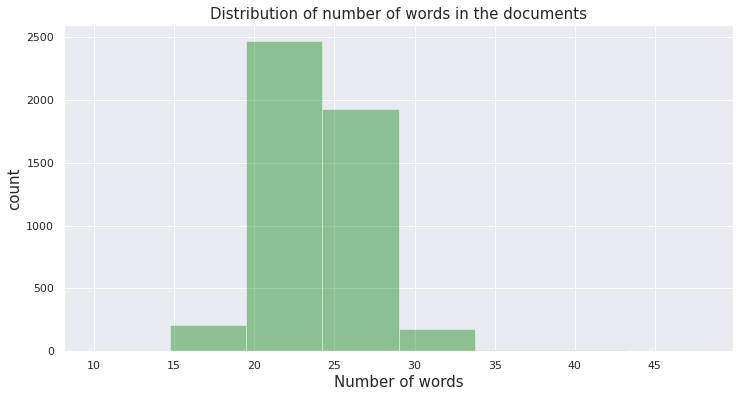

In [49]:
plt.figure(figsize=(12,6))
sns.distplot(data["Number of words"], kde=False, color="green",bins=8)
plt.xlabel("Number of words",size=15)
plt.ylabel("count",size=15)
plt.title("Distribution of number of words in the documents",size=15)

**Text Processing**

In [51]:
import re
def clean_text(text):
    clean=text.lower()
    clean=re.sub("[^a-z]"," ",clean)
    clean=re.sub(r"\s+[a-z]\s+"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
data["cleaned_text"]=Netflix["description"].apply(clean_text)

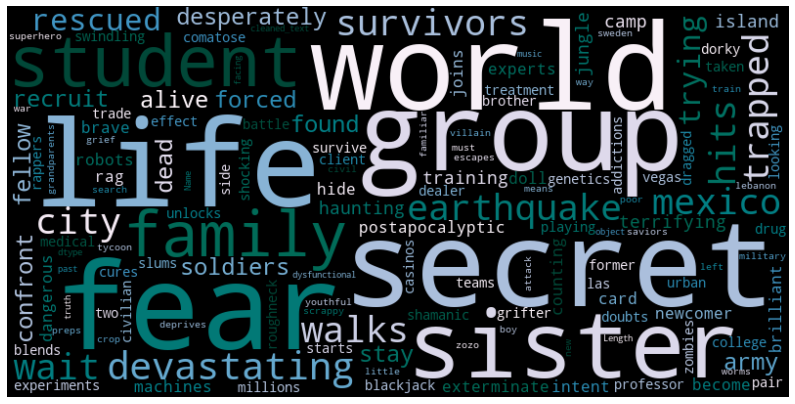

In [52]:
cloud=WordCloud(colormap="PuBuGn",width=800,height=400).generate(str(data["cleaned_text"]))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [60]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
stop=stopwords.words('english')
data["stops_removed"]=data["cleaned_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data["tokenized"]=data["stops_removed"].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
data["lemmatized"]=data["tokenized"].apply(lambda x: word_lemmatizer(x))
data["joined"]=data["lemmatized"].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [65]:
data["stops_removed_2"]=data["joined"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

**LDA Model**

In [70]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(data["lemmatized"])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data["lemmatized"]]

In [71]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

In [72]:
lda_model.print_topics()

[(0,
  '0.014*"killer" + 0.012*"must" + 0.011*"murder" + 0.009*"detective" + 0.009*"find" + 0.008*"take" + 0.008*"suspect" + 0.007*"search" + 0.007*"discover" + 0.007*"target"'),
 (1,
  '0.008*"one" + 0.007*"life" + 0.007*"world" + 0.007*"history" + 0.006*"war" + 0.006*"try" + 0.005*"follow" + 0.005*"use" + 0.005*"ii" + 0.005*"skills"'),
 (2,
  '0.027*"school" + 0.024*"high" + 0.013*"new" + 0.010*"must" + 0.008*"family" + 0.007*"master" + 0.006*"teen" + 0.006*"students" + 0.006*"soon" + 0.006*"confront"'),
 (3,
  '0.013*"help" + 0.008*"gang" + 0.008*"police" + 0.008*"two" + 0.008*"cop" + 0.008*"catch" + 0.007*"find" + 0.007*"try" + 0.007*"officer" + 0.007*"force"'),
 (4,
  '0.014*"true" + 0.013*"old" + 0.012*"boy" + 0.012*"story" + 0.011*"father" + 0.011*"become" + 0.009*"year" + 0.009*"base" + 0.008*"young" + 0.008*"friend"'),
 (5,
  '0.008*"documentary" + 0.007*"battle" + 0.007*"band" + 0.007*"group" + 0.007*"develop" + 0.007*"martial" + 0.006*"learn" + 0.006*"america" + 0.006*"arts"

In [75]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model,
texts=data["lemmatized"], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.28567838640428617
